<a href="https://colab.research.google.com/github/samuelbigot/MLStrainStress/blob/main/MLStressStrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from tabulate import tabulate
from helper_functions import helperFunctions, params
# test 1

In [2]:
hf = helperFunctions("datafile.csv")
df = hf.import_datafile("datafile.csv")

In [ ]:
sorted_df = hf.processDfIntoMaterials(df)

In [ ]:
def optimise_law_materials(df_material, p = True):

    error_at_each_step = []
    def callback_func(params):
        error = hf.material_viscoplastic_law_error(params, sigma_exp_material)
        error_at_each_step.append(error)

    # Initialize parameters
    params_init = np.array([50, 0.4, 0.001, -2, 5])  # Initial guess for k, n, m, m6, sigma0

    sigma_exp_material = df_material.drop(["S0", "k", "n", "m", "m6", "E*"], axis = 1).values

    # Perform gradient descent using SciPy's minimize function
    result = minimize(hf.material_viscoplastic_law_error, params_init, args=(sigma_exp_material), method='L-BFGS-B', callback=callback_func)

    # Extract optimal parameters
    optimal_params = result.x
    k_opt, n_opt, m_opt, m6_opt, sigma0_opt = optimal_params




    if p == True:
        for epsilon_dot, sigma_exp in zip(hf.DEFAULT_STRAIN_RATES, sigma_exp_material):
            # plt.plot(error_at_each_step)

            k = df_material.iloc[0]["k"]
            n = df_material.iloc[0]["n"]
            m = df_material.iloc[0]["m"]
            m6 = df_material.iloc[0]["m6"]
            sigma0 = df_material.iloc[0]["S0"]

            # Round the optimal parameters to 2 decimal places
            k_opt_rounded = round(k_opt, 2)
            n_opt_rounded = round(n_opt, 2)
            m_opt_rounded = round(m_opt, 2)
            m6_opt_rounded = round(m6_opt, 2)
            sigma0_opt_rounded = round(sigma0_opt, 2)
            error = hf.viscoplastic_law_error((k, n, m, m6, sigma0), hf.DEFAULT_EPS_ARRAY, epsilon_dot, sigma_exp)
            error_opt_rounded = round(error_at_each_step[-1], 5)



            # Define data as a list of tuples
            data = [
                ("Final Error", error_opt_rounded, error),
                ("k", k_opt_rounded, k),
                ("n", n_opt_rounded, n),
                ("m", m_opt_rounded, m),
                ("m6", m6_opt_rounded, m6),
                ("sigma0", sigma0_opt_rounded, sigma0)
            ]

            # Print as a table
            table = tabulate(data, headers=["Parameter", "Optimal Value", "Real Value"], tablefmt="grid")
        print(table)

    opt_params = params(sigma0_opt, k_opt, n_opt, m_opt, m6_opt)

    return opt_params

In [ ]:
def testMaterial(index):
    df_material = sorted_df.iloc[index*3:index*3+3]
    opt_params = optimise_law_materials(df_material)
    hf.validate_material(df_material, opt_params)

In [ ]:
testMaterial(784)

In [ ]:
def compute_curves(sorted_df):
    total_iterations = len(sorted_df) // 3
    results = []
    for i in range(total_iterations):
        df_material = sorted_df[3 * i: 3 * (i+1)]
        opt_params = optimise_law_materials(df_material, p = False)

        row1 = df_material.iloc[0]
        stress_data = df_material.drop(hf.param_list + ["E*"], axis = 1)

        error_opt = hf.material_viscoplastic_law_error((opt_params.k, opt_params.n, opt_params.m, opt_params.m6, opt_params.s0), stress_data.values)


        error = 0
        for index, epsilon_dot in enumerate(hf.DEFAULT_STRAIN_RATES):
            e = hf.viscoplastic_law_error((row1["k"], row1["n"], row1["m"], row1["m6"], row1["S0"]), hf.DEFAULT_EPS_ARRAY, epsilon_dot, stress_data.iloc[index])
            error += e

        results.append({
            'k_opt': opt_params.k,
            'n_opt': opt_params.n,
            'm_opt': opt_params.m,
            'm6_opt': opt_params.m6,
            's0_opt': opt_params.s0,
            'error_opt': error_opt,
            'k_real': row1["k"],
            'n_real': row1["n"],
            'm_real': row1["m"],
            'm6_real': row1["m6"],
            's0_real': row1["S0"],
            'error': error/3
        })

        # Print progress
        progress_percent = (i + 1) / total_iterations * 100
        print(f"Processed {i + 1}/{total_iterations} ({progress_percent:.2f}%)", end="\r")


    return pd.DataFrame(results)

In [ ]:
results = compute_curves(sorted_df)

/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:52: RuntimeWarning: overflow encountered in square
  return np.mean((np.array(sigma_pred) - np.array(sigma_exp))**2)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


/content/helper_functions.py:36: RuntimeWarning: overflow encountered in scalar power
  sigma_pred = sigma0 + k * epsilon**n * epsilon_dot**m * np.exp(m6*epsilon)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/content/helper_functions.py:36: RuntimeWarning: overflow encountered in scalar power
  sigma_pred = sigma0 + k * epsilon**n * epsilon_dot**m * np.exp(m6*epsilon)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/content/helper_functions.py:36: RuntimeWarning: o

In [ ]:
results.to_csv("OptimumParameters.csv")
results

,k_opt,n_opt,m_opt,m6_opt,s0_opt,error_opt,k_real,n_real,m_real,m6_real,s0_real,error
0,52.010538,0.063377,0.005422,-2.244008,7.687205,0.190499,50.0,0.05,0.001,-2.0,5.0,1.874842
1,695.938712,0.002528,-0.000872,-0.069581,-643.014314,1.259676,50.0,0.05,0.001,-1.2,5.0,4.345438
2,52.197987,0.067221,-0.003118,-0.840726,7.171478,0.142580,50.0,0.05,0.001,-0.6,5.0,1.347442
3,51.291643,0.056560,0.000520,-0.393871,6.392160,0.043667,50.0,0.05,0.001,-0.3,5.0,1.101728
4,53.135992,0.059725,0.089742,-2.090844,5.908932,0.012830,50.0,0.05,0.090,-2.0,5.0,2.003808
...,...,...,...,...,...,...,...,...,...,...,...,...
805,279.882446,0.067984,0.000386,0.713615,96.598873,8.815442,300.0,0.80,0.001,0.0,300.0,18.850751
806,278.255937,0.065960,0.003685,0.711561,97.952770,9.172509,300.0,0.80,0.010,0.0,300.0,18.755860
807,279.319560,0.059716,0.017124,0.677165,97.875151,13.384732,300.0,0.80,0.050,0.0,300.0,17.945170
808,277.828262,0.053977,0.028835,0.650831,99.495496,24.680377,300.0,0.80,0.090,0.0,300.0,17.256840


BELOW CODE TO CHECK RESULTS NO NEED TO RUN THE ABOVE AGAIN JUST LOAD OPTIMUM PARAMETERS


```
# This is formatted as code
```



In [ ]:
#add code to load optimum parameters

In [ ]:

df_first = df.loc[(df["S0"] == 5) & (df["k"] == 50) & (df["n"] == 0.05) & (df["m"] == 0.2) & (df["m6"] == -0.6) & (df["E*"] == 0.01)]
r = df_first.iloc[0]

S_Pred = 4.84 + 52*df_first["E"] ** 0.05 *  0.01 ** 0.19 * np.exp(df_first["E"] * -0.57)
S_Equation = df_first["S0"] + df_first["k"] * (df_first["E"]**df_first["n"]) * df_first["E*"]**df_first["m"] * np.exp(df_first["E"] * df_first["m6"])


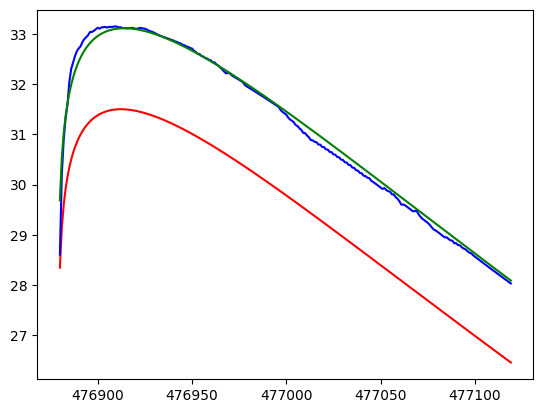

In [ ]:
plt.plot(S_Equation,'r')
plt.plot(df_first["S"],'b')
plt.plot(S_Pred, 'g')